# Image classification using an CNN with TensorFlow

## 1. Import & Preprocessing

### a) Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### b) Importing data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv('/content/gdrive/My Drive/Annotated Data/Fashion_MNIST/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/Annotated Data/Fashion_MNIST/fashion-mnist_test.csv')

In [ ]:
train_data.head()

In [ ]:
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0]
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0]

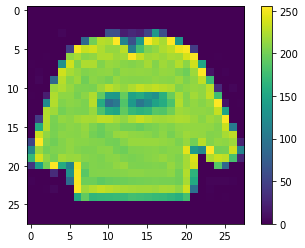

In [ ]:
plt.figure()
plt.imshow(train_images.values[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

### c) Data preparation

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / np.float32(255)
test_images = test_images / np.float32(255)

In [ ]:
train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,0.000000,0.411765,0.360784,0.396078,0.419608,0.392157,0.517647,0.000000,0.000000,0.007843,0.015686,0.0,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.588235,0.890196,...,0.827451,0.862745,0.839216,0.290196,0.000000,1.000000,0.870588,0.501961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172549,0.047059,0.0,0.0,0.156863,0.525490,0.635294,0.749020,0.839216,0.639216,0.572549,0.647059,0.309804,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,0.447059,0.717647,0.439216,0.215686,0.090196,0.282353,0.400000,0.647059,0.627451,0.109804,0.000000,0.0,0.000000,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.094118,0.737255,0.639216,0.364706,0.533333,...,0.670588,0.976471,0.811765,0.772549,0.792157,0.176471,0.000000,0.011765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.0,0.0,0.000000,0.086275,0.082353,0.098039,0.270588,0.203922,0.176471,0.290196,0.152941,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.180392,0.000000,0.082353,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.098039,0.733333,0.741176,0.000000,...,0.901961,0.929412,0.898039,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.266667,0.454902,0.439216,0.533333,0.576471,0.564706,0.474510,0.400000,0.247059,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## 2. Model specific data preparation

### a) Load the data

In [ ]:
x_train_tf = tf.convert_to_tensor(train_images.values.reshape((-1, 28, 28, 1)))
y_train_tf = tf.convert_to_tensor(train_labels.values)
x_test_tf = tf.convert_to_tensor(test_images.values.reshape((-1, 28, 28, 1)))
y_test_tf = tf.convert_to_tensor(test_labels.values)

### b) Tensor view of the data

In [ ]:
x_train_tf.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
x_train_tf[0][5]

<tf.Tensor: shape=(28, 1), dtype=float32, numpy=
array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18431373],
       [0.9882353 ],
       [0.91764706],
       [0.93333334],
       [0.8784314 ],
       [0.84313726],
       [0.84313726],
       [0.8980392 ],
       [0.42352942],
       [0.7058824 ],
       [0.8117647 ],
       [0.8392157 ],
       [0.8784314 ],
       [0.90588236],
       [0.9764706 ],
       [0.99607843],
       [0.1764706 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)>

In [ ]:
y_train_tf[0]

<tf.Tensor: shape=(), dtype=int64, numpy=2>

## 3. Model definition

### a) Sequentially add layers

In [ ]:
initializer_nn = tf.random_uniform_initializer(
    minval=-1, maxval=1, seed=123)

In [ ]:
model_tf = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), filters=6, kernel_size=5, strides=1, padding="same", activation='sigmoid'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(16, kernel_size=5, activation='sigmoid'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid', kernel_initializer=initializer_nn),
    keras.layers.Dense(84, activation='sigmoid', kernel_initializer=initializer_nn),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer_nn)
])

### b) Inspect the model

In [ ]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### c) Inspect the first convolutional layer

In [ ]:
hidden1_tf_ante = model_tf.layers[0]
weights_tf_ante, biases_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[0]

array([[[-0.16073376,  0.03208217,  0.05344588, -0.16841346,
          0.00511199, -0.12950547]],

       [[ 0.17945959, -0.09147053,  0.14175595,  0.10636474,
         -0.07896642, -0.16588624]],

       [[ 0.1273757 , -0.0937277 , -0.17594701,  0.14852177,
          0.04041021,  0.07712741]],

       [[ 0.16992529,  0.15400575, -0.13764636,  0.11489804,
          0.02582307,  0.08888899]],

       [[ 0.10705356,  0.17838337,  0.10333325,  0.0035753 ,
          0.09797095,  0.02050263]]], dtype=float32)

In [ ]:
weights_tf_ante.shape

(5, 5, 1, 6)

In [ ]:
biases_tf_ante

array([0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases_tf_ante.shape

(6,)

## 4. Loss & Optimizer

In [ ]:
loss_fn_tf = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer_tf = tf.keras.optimizers.Adam()

test_loss = tf.keras.metrics.Mean(name='test_loss')

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

## 5. Training

### a) Training loop

In [ ]:
def train_step_tf(model, optimizer, loss_fn, batch_size = 10):
  losses = []
  for beg_i in range(0, x_train_tf.shape[0], batch_size):
    x_train_batch_tf = x_train_tf[beg_i:beg_i + batch_size]
    y_train_batch_tf = y_train_tf[beg_i:beg_i + batch_size]

    with tf.GradientTape() as tape:
      y_pred_tf = model(x_train_batch_tf, training=True)
      loss = loss_fn(y_train_batch_tf, y_pred_tf)

    grads = tape.gradient(loss, model.trainable_weights)

    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    
    losses.append(loss)
    train_accuracy.update_state(y_train_batch_tf, y_pred_tf)
  return losses

In [ ]:
def test_step_tf(model, optimizer, loss_fn, batch_size = 10):
  for beg_i in range(0, x_train_tf.shape[0], batch_size):
    x_test_batch_tf = x_train_tf[beg_i:beg_i + batch_size]
    y_test_batch_tf = y_train_tf[beg_i:beg_i + batch_size]
    y_pred_tf = model(x_test_batch_tf, training=False)
    loss = loss_fn(y_test_batch_tf, y_pred_tf)
    test_loss.update_state(loss)
    test_accuracy.update_state(y_test_batch_tf, y_pred_tf)

In [ ]:
train_loss_tf = []
test_loss_tf = []

train_acc_tf = []
test_acc_tf = []

epochs = 25

for epoch in range(epochs):
  loss = train_step_tf(model_tf, optimizer_tf, loss_fn_tf)
  mean_loss_tf = float(tf.reduce_mean(loss))
  train_loss_tf.append(mean_loss_tf)
  train_acc_tf.append(train_accuracy.result()*100)

  test_step_tf(model_tf, optimizer_tf, loss_fn_tf)

  template = ("Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}")
  print(template.format(epoch+1, mean_loss_tf, train_accuracy.result()*100, test_loss.result(), test_accuracy.result()*100))
  
  test_loss_tf.append(test_loss.result())
  test_acc_tf.append(test_accuracy.result()*100)

  test_loss.reset_states()
  train_accuracy.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.7099212408065796, Accuracy: 73.12667083740234, Test Loss: 0.4950437843799591, Test Accuracy: 81.00666046142578
Epoch 2, Loss: 0.4586751163005829, Accuracy: 82.74833679199219, Test Loss: 0.4046212136745453, Test Accuracy: 85.16667175292969
Epoch 3, Loss: 0.3970807194709778, Accuracy: 85.16500091552734, Test Loss: 0.368003785610199, Test Accuracy: 86.42832946777344
Epoch 4, Loss: 0.3620176911354065, Accuracy: 86.47500610351562, Test Loss: 0.34288081526756287, Test Accuracy: 87.4000015258789
Epoch 5, Loss: 0.33772268891334534, Accuracy: 87.42333221435547, Test Loss: 0.3203188180923462, Test Accuracy: 88.20166778564453
Epoch 6, Loss: 0.3182201683521271, Accuracy: 88.07499694824219, Test Loss: 0.30173423886299133, Test Accuracy: 88.83833312988281
Epoch 7, Loss: 0.3013189733028412, Accuracy: 88.65833282470703, Test Loss: 0.2873189151287079, Test Accuracy: 89.28166961669922
Epoch 8, Loss: 0.2863866686820984, Accuracy: 89.24000549316406, Test Loss: 0.2756732106208801, Test Acc

### b) Training progress

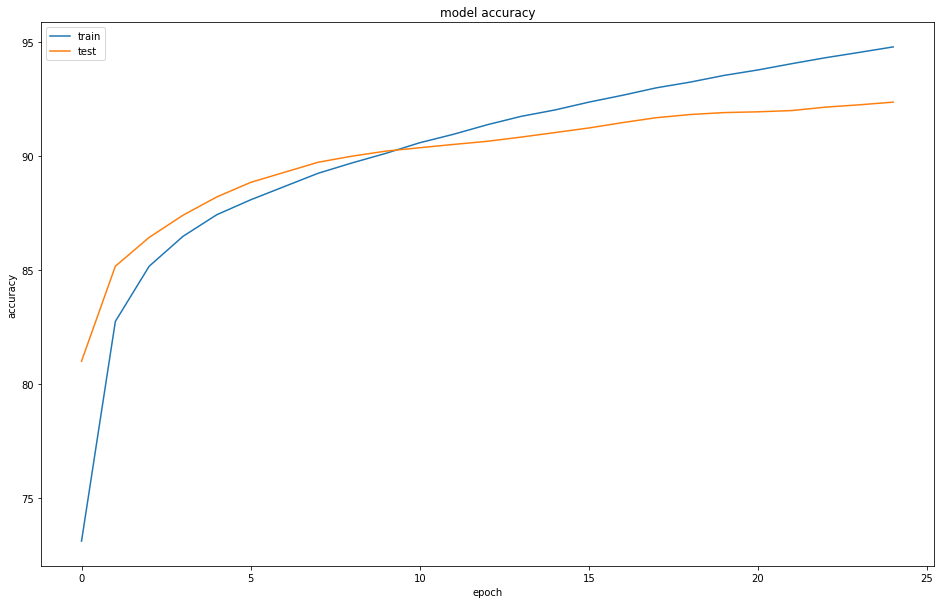

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(train_acc_tf)
plt.plot(test_acc_tf)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

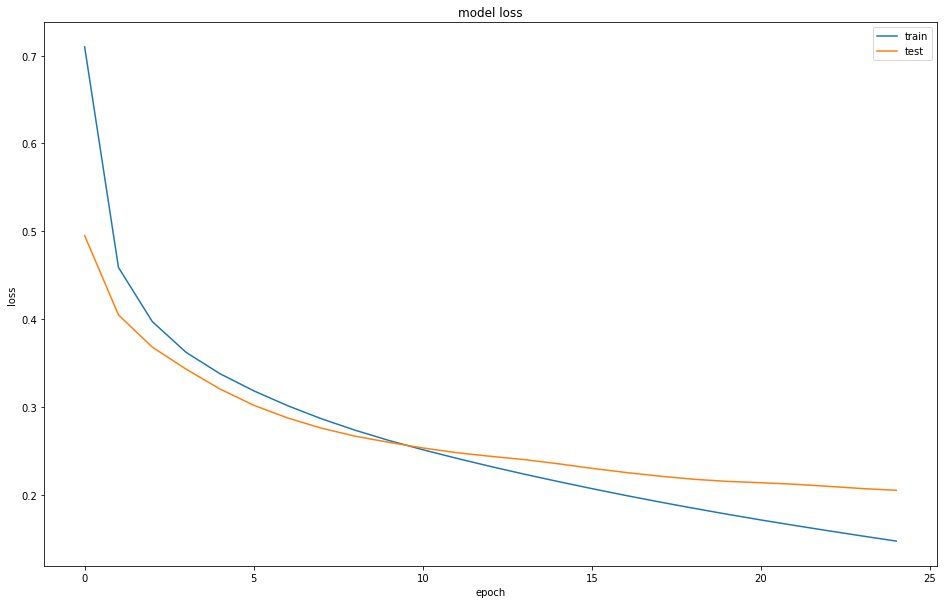

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(train_loss_tf)
plt.plot(test_loss_tf)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### c) Inspect the first conv. layer after training

In [ ]:
hidden1_tf_post = model_tf.layers[0]
weights_tf_post, biases_tf_post = hidden1_tf_post.get_weights()
weights_tf_post[0]

array([[[ 1.8557616e+00, -8.3092457e-01,  1.5087665e+00, -9.8559624e-01,
          1.2945112e+00,  1.1212626e+00]],

       [[-7.3368412e-01,  1.4803471e-01,  2.6863298e+00,  5.5886276e-02,
         -3.5919750e-01,  5.1561779e-01]],

       [[-1.4152484e+00,  9.5645702e-01,  2.0043008e+00,  8.6771822e-01,
         -3.7848327e-01, -1.3174005e+00]],

       [[-6.5326887e-01,  6.5662616e-01,  8.4960765e-01,  8.8056570e-01,
          1.4414251e+00, -1.1903545e+00]],

       [[-1.6198080e-03, -6.2909329e-01,  1.2418716e+00, -2.1147741e-02,
          1.7122781e+00, -1.9335863e-01]]], dtype=float32)

In [ ]:
biases_tf_post

array([-0.51025164, -1.6538384 , -0.21228085, -1.8112352 , -0.4792024 ,
        1.2640122 ], dtype=float32)

## 6. Evaluation

In [ ]:
outputs = np.argmax(model_tf(x_test_tf),1)
correct = np.sum(outputs == np.array(y_test_tf))
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % ((correct / len(x_test_tf))*100))